In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_churn = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
pd.set_option('display.max_columns',99)

In [4]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_churn.shape

(7043, 21)

Our data set contains 7043 rows and 21 columns.

In [6]:
df_churn.describe() #checking the statistical descriptions 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Backup Data

In [9]:
Backup_data = df_churn.copy()

### Exploratry Data Analysis :

As it is classification problem we are checking our data is imbalanced or not.

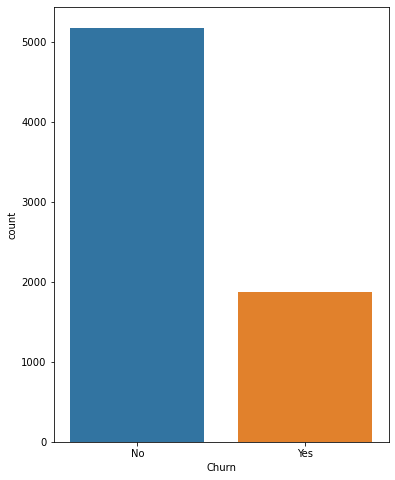

In [10]:
plt.figure(figsize=(6,8))
sns.countplot(x='Churn',data=df_churn)

Our data is impabalnced as we can cehck 'yes' in churning is less and 'No' is Higher.

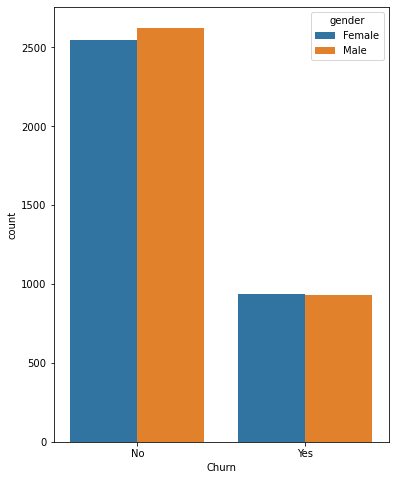

In [11]:
plt.figure(figsize=(6,8))
sns.countplot(x='Churn',data=df_churn,hue='gender') # visualizing the churn ratio as per gender

In the above visualization we can see the rato of male and female customer who stop doing business are quite identical.

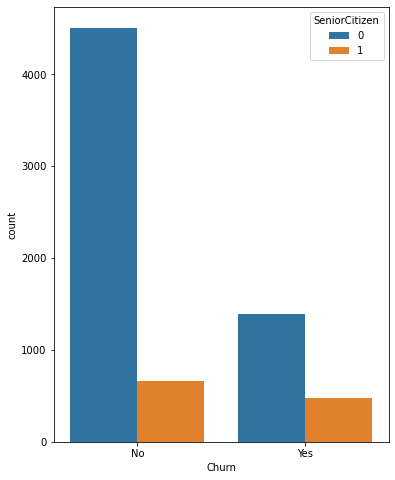

In [12]:
plt.figure(figsize=(6,8))
sns.countplot(x='Churn',data=df_churn,hue='SeniorCitizen') # visualizing the churn ration as per SeniorCitizen

In the above graph we can see the count of those people who are not senior citizens their ratio is higher.it show good relation with out label data.

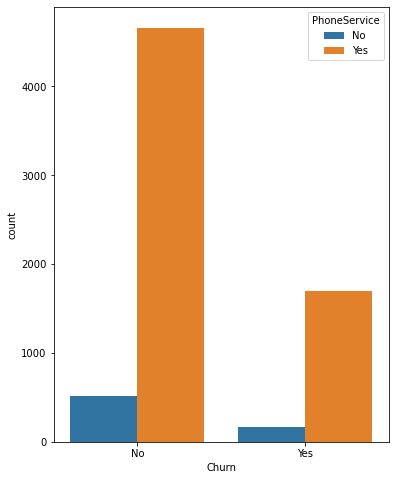

In [13]:
plt.figure(figsize=(6,8))
sns.countplot(x='Churn',data=df_churn,hue='PhoneService') # visualizing the churn ratio as per PhoneService

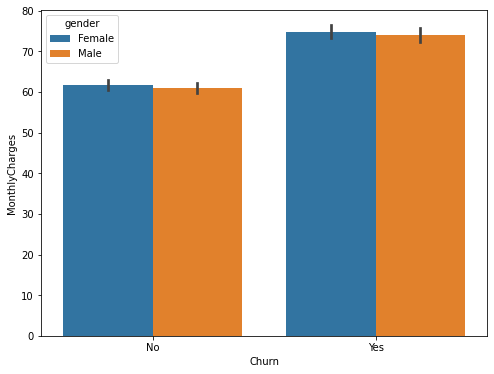

In [14]:
# visualizing the relation between MonthlyCharges and Churn as per gender
plt.figure(figsize=(8,6))
sns.barplot(x='Churn',y='MonthlyCharges',data=df_churn,hue='gender') 

In [15]:
df_churn['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

<Figure size 864x576 with 0 Axes>

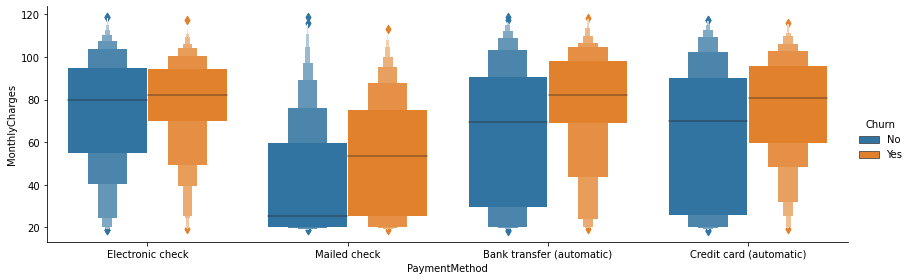

In [16]:
# visualizing the relation between MonthlyCharges and PaymentMethod as per Churn
plt.figure(figsize=(12,8))
sns.catplot(x='PaymentMethod',y='MonthlyCharges',data=df_churn,hue='Churn',kind="boxen",height = 4, aspect = 3)

###### Categorical Encoding :

In the data set most ob columns are in categorical hence we have to convert into numeric format.

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
df_churn.gender = le.fit_transform(df_churn.gender)
df_churn.SeniorCitizen = le.fit_transform(df_churn.SeniorCitizen)
df_churn.Partner = le.fit_transform(df_churn.Partner)
df_churn.Dependents = le.fit_transform(df_churn.Dependents)
df_churn.PhoneService = le.fit_transform(df_churn.PhoneService)
df_churn.MultipleLines = le.fit_transform(df_churn.MultipleLines)
df_churn.InternetService = le.fit_transform(df_churn.InternetService)
df_churn.OnlineSecurity = le.fit_transform(df_churn.OnlineSecurity)
df_churn.OnlineBackup = le.fit_transform(df_churn.OnlineBackup)
df_churn.DeviceProtection = le.fit_transform(df_churn.DeviceProtection)
df_churn.TechSupport = le.fit_transform(df_churn.TechSupport)
df_churn.StreamingTV = le.fit_transform(df_churn.StreamingTV)
df_churn.StreamingMovies = le.fit_transform(df_churn.StreamingMovies)
df_churn.Contract = le.fit_transform(df_churn.Contract)
df_churn.PaperlessBilling = le.fit_transform(df_churn.PaperlessBilling)
df_churn.PaymentMethod = le.fit_transform(df_churn.PaymentMethod)
df_churn.Churn = le.fit_transform(df_churn.Churn)

There is column 'TotalCharges' has float values but its showing 'object' type as checked there is " " space so we are converting space with 'nan' and droping those 11 rows.

In [20]:
df_churn['TotalCharges'] = df_churn['TotalCharges'].replace(" ",np.nan)

In [21]:
df_churn['TotalCharges'].isnull().sum()

11

In [22]:
df_churn = df_churn[df_churn['TotalCharges'].notnull()]

In [23]:
df_churn = df_churn.reset_index()[df_churn.columns]

In [24]:
df_churn['TotalCharges'] = df_churn['TotalCharges'].astype(float)

In [25]:
df_churn = df_churn.drop(columns=['customerID'],axis=1) #droping the 'customerID' columns as it has no use

In [26]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


##### Checking correlation using heat map

In [27]:
corrrelation = df_churn.corr()

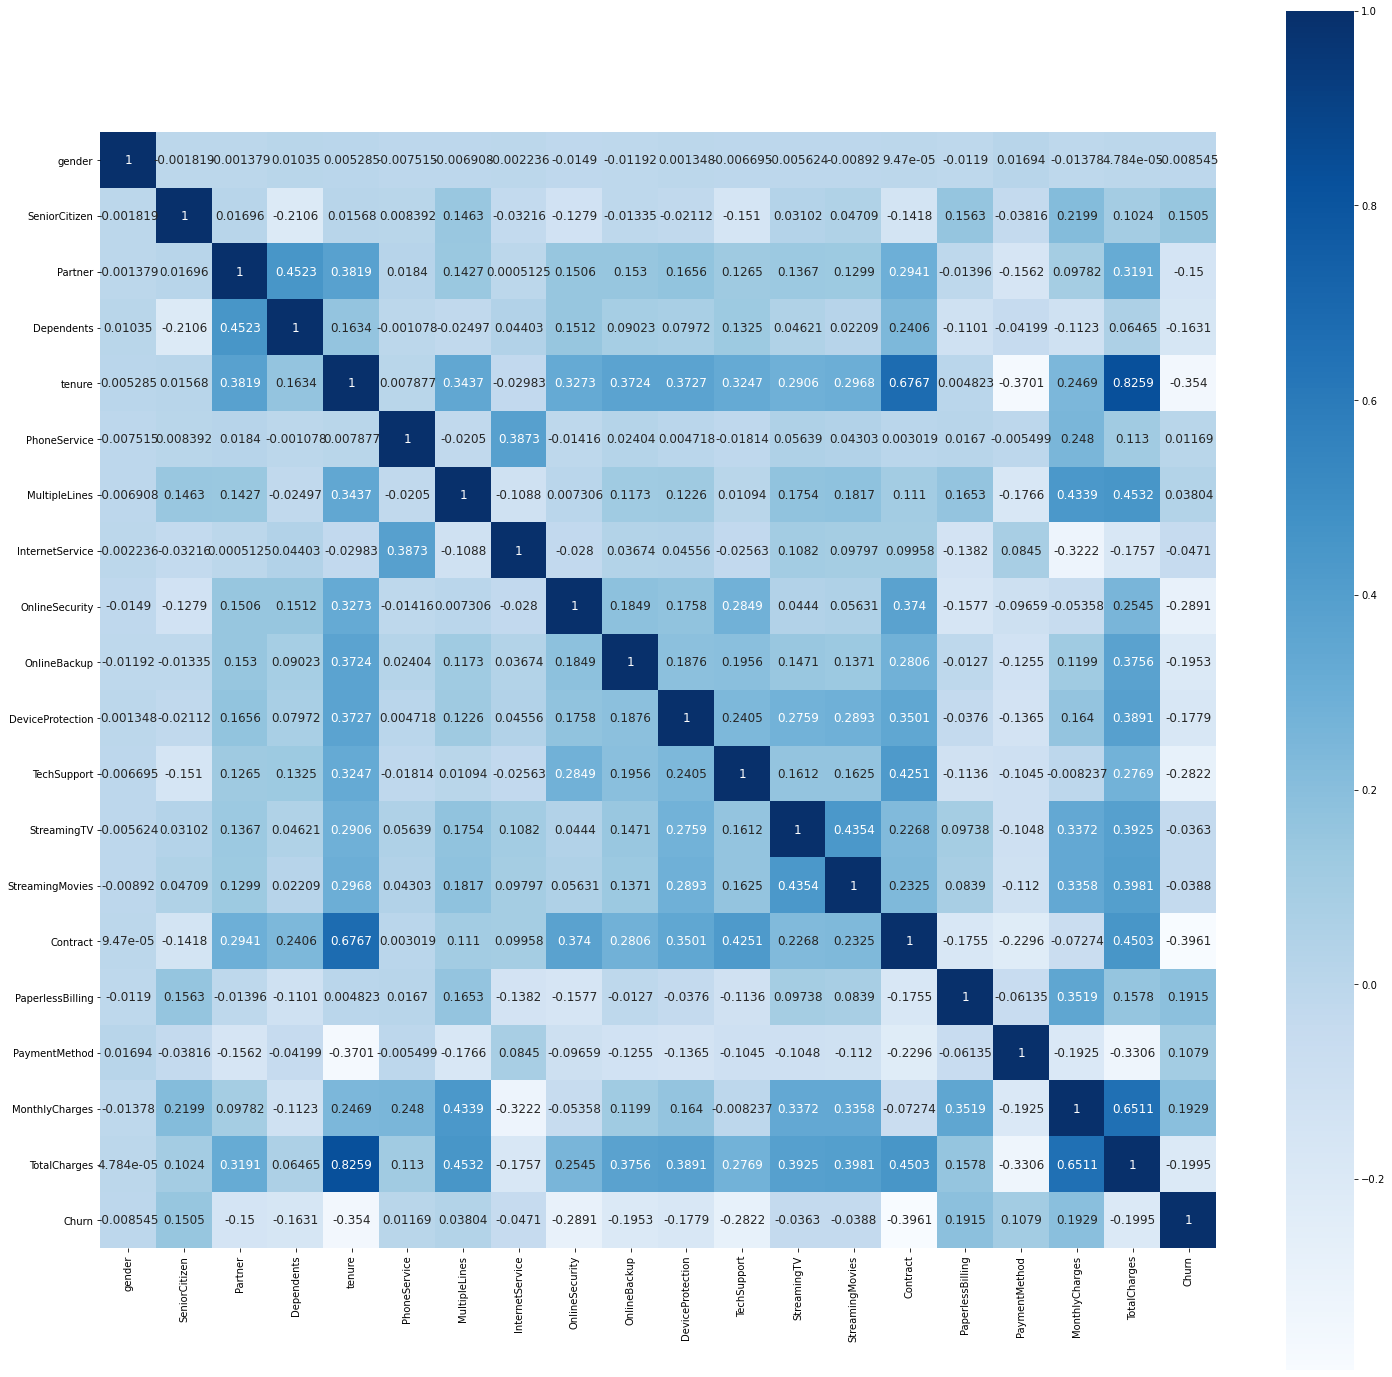

In [28]:
plt.figure(figsize=(25,25))
sns.heatmap(corrrelation,cbar=True, square=True,fmt='.4g',annot=True,annot_kws={'size':12},cmap='Blues')

As per heat map we see 'tenure' ,'Contract' and'TotalCharges' showing corrrelations other hand many columns like 'TotalCharges','InternetService','OnlineSecurity','OnlineBackup','TechSupport' showing negatively correlate witrh our label data.

### Outliars Detection and Removel :

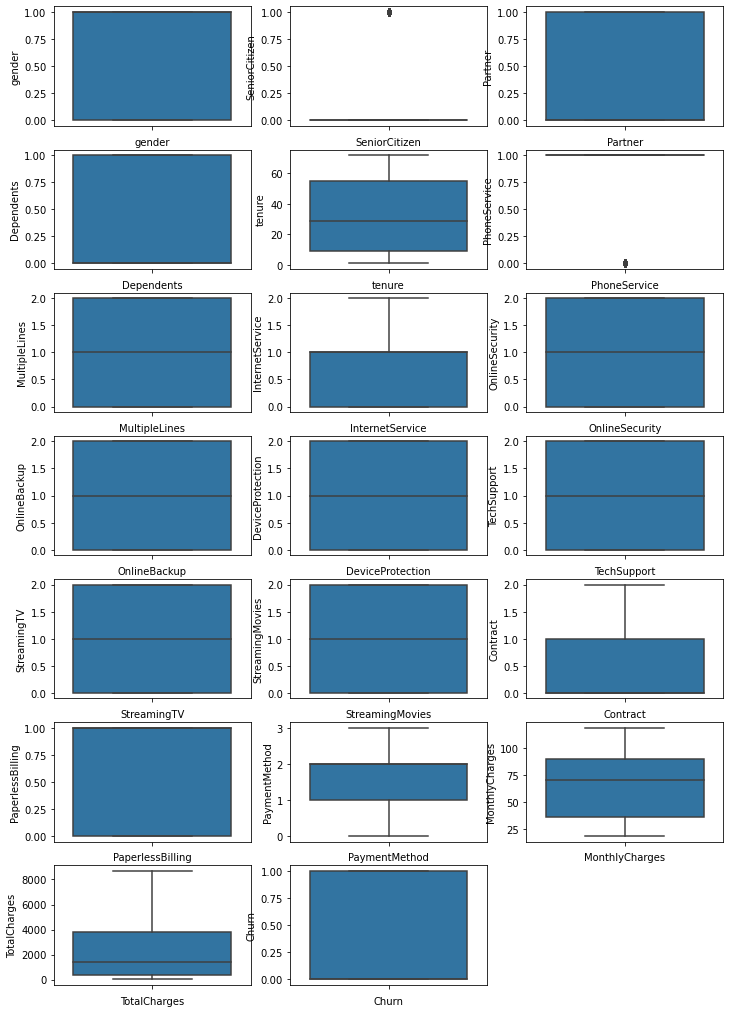

In [29]:
# Checking the distribution of data
plt.figure(figsize=(12,18))
plotnumber=1
for column in df_churn:
    if plotnumber <=20:
        plt.subplot(7,3,plotnumber)
        sns.boxplot(df_churn[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

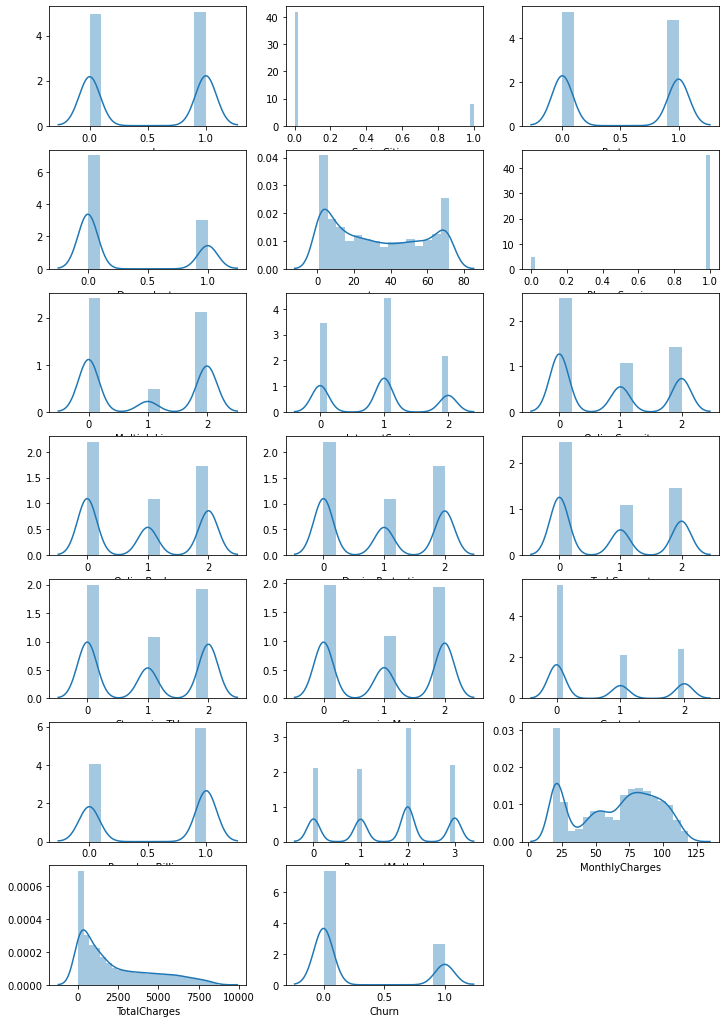

In [30]:
# Checking the distribution of data
plt.figure(figsize=(12,18))
plotnumber=1
for column in df_churn:
    if plotnumber <=20:
        plt.subplot(7,3,plotnumber)
        sns.distplot(df_churn[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

In the data set almost columns contains binory values and as boxplot it shows there is not outliars.

In [31]:
# from scipy.stats import zscore

In [32]:
# z_score = zscore(df_churn[['MonthlyCharges','TotalCharges','tenure']])
# abs_z_score = np.abs(z_score)
# filtering_entry = (abs_z_score <3).all(axis=1)
# df_churn = df_churn[filtering_entry]
# df_churn.describe()
# df_churn.head()

In [33]:
# df_churn.shape

I have checked scores after removing the skwness from 'MonthlyCharges','TotalCharges','tenure' but score was less hence 
i am not removing the skwness and keeping as it is.

### Feature Selection :

In [34]:
from sklearn.ensemble import ExtraTreesClassifier #using 'ExtraTreesClassifier' for feature selection

In [35]:
X_feature = df_churn.drop(columns=['Churn'],axis=1)
y_feature = df_churn['Churn']

In [36]:
model = ExtraTreesClassifier()

In [37]:
model.fit(X_feature,y_feature)

ExtraTreesClassifier()

In [38]:
print(model.feature_importances_)

[0.03772773 0.02648396 0.02985747 0.02459594 0.15161916 0.00661223
 0.02678165 0.03909025 0.04442528 0.03431884 0.02863037 0.04114127
 0.02260287 0.02375781 0.08104245 0.02927494 0.0632824  0.13901487
 0.14974053]


In [39]:
fearures_rank = pd.Series(model.feature_importances_,index=X_feature.columns)
fearures_rank

gender              0.037728
SeniorCitizen       0.026484
Partner             0.029857
Dependents          0.024596
tenure              0.151619
PhoneService        0.006612
MultipleLines       0.026782
InternetService     0.039090
OnlineSecurity      0.044425
OnlineBackup        0.034319
DeviceProtection    0.028630
TechSupport         0.041141
StreamingTV         0.022603
StreamingMovies     0.023758
Contract            0.081042
PaperlessBilling    0.029275
PaymentMethod       0.063282
MonthlyCharges      0.139015
TotalCharges        0.149741
dtype: float64

As per above feature selection technique 'TotalCharges' ,'MonthlyCharges','tenure' contributing the highest and 'PhoneService'
service is showing lowest hence we can drop it.

#### Dealing with Imbalanced Data :

In [40]:
from sklearn.utils import resample # using resample method

In [41]:
minority = df_churn[df_churn.Churn==1]
majority = df_churn[df_churn.Churn==0]

minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
df_churn = pd.concat([minority_upsample, majority], axis=0)

In [42]:
df_churn['Churn'].value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

Spliting the data into dependent and independent variables

In [43]:
X = df_churn.drop(['Churn','PhoneService'],axis=1)
y = df_churn['Churn']

In [44]:
print("The Shape Of X",X.shape)
print("The Shape Of Y",y.shape)

The Shape Of X (10326, 18)
The Shape Of Y (10326,)


#### Model Building :

In [45]:
from sklearn.model_selection import train_test_split #for spliting into train and test 
from sklearn.preprocessing import StandardScaler  # for scaleing the data

In [46]:
scaler = StandardScaler()

In [47]:
x_scaler = scaler.fit_transform(X)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.25,random_state=111)

Importing libraries for model building......!

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
svm=SVC()
gdboost=GradientBoostingClassifier()
xgboost=XGBClassifier()
print("Model is created")

Model is created


In [51]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)
xgboost.fit(X_train,y_train)
print("Model is trained")

[18:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model is trained


In [52]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))
print("xgboost classification score",xgboost.score(X_train,y_train))

Lr classification score 0.7572314049586777
knn classification score 0.8396177685950413
dt classification score 0.9984504132231405
rf classification score 0.9983212809917356
adb classification score 0.7749225206611571
svm classification score 0.812629132231405
gdboost classification score 0.797004132231405
xgboost classification score 0.9457644628099173


### Model Evaluation :

Using confusion matrix in order to evaluate the models accuracy.

In [54]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)
xgboost_yprad = xgboost.predict(X_test)

In [55]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[ 932  386]
 [ 256 1008]]


In [56]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[ 866  452]
 [ 158 1106]]


In [57]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[1040  278]
 [  71 1193]]


In [117]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for rf_model",'\n',rf_conf_mat)

confusion matrix for rf_model 
 [[1103  215]
 [  64 1200]]


In [118]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for adb_model",'\n',adb_conf_mat)

confusion matrix for adb_model 
 [[ 952  366]
 [ 231 1033]]


In [60]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[ 955  363]
 [ 212 1052]]


In [61]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[ 966  352]
 [ 214 1050]]


In [62]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[1053  265]
 [ 102 1162]]


In [63]:

lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)


xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.78      0.71      0.74      1318
           1       0.72      0.80      0.76      1264

    accuracy                           0.75      2582
   macro avg       0.75      0.75      0.75      2582
weighted avg       0.75      0.75      0.75      2582

 knn classification_report 
               precision    recall  f1-score   support

           0       0.85      0.66      0.74      1318
           1       0.71      0.88      0.78      1264

    accuracy                           0.76      2582
   macro avg       0.78      0.77      0.76      2582
weighted avg       0.78      0.76      0.76      2582

 dt classification_report 
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      1318
           1       0.81      0.94      0.87      1264

    accuracy                           0.86      2582
   macro avg       0.87      0.87      0.86

#### ROC AND AUC :

In [64]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [65]:
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

0.752300186319894
0.7660280728376326
0.8664517345037552
0.8950011765044852
0.7697766802404872
0.7784305910374368
0.7818124411747758
0.8591207909951787


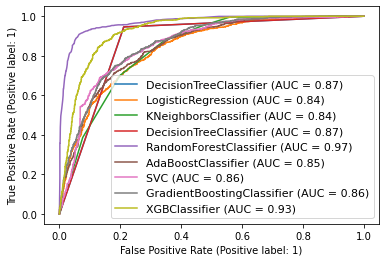

In [66]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

#### CrossValidation :

In [68]:
from sklearn.model_selection import KFold,cross_val_score

In [69]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [72]:
print("Mean of Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=8).mean())
print("Mean of Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=8).mean())
print("Mean of Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=8).mean())
print("Mean of Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=8).mean())
print("Mean of Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=8).mean())
print("Mean of Cross validation score for SVM model","=>",cross_val_score(svm,X,y,cv=8).mean())
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=8).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=8).mean())

Mean of Cross validation score for lr model => 0.7544110538672624
Mean of Cross validation score for knn model => 0.7669972949279147
Mean of Cross validation score for dt model => 0.882142846420358
Mean of Cross validation score for rf model => 0.9076133818504974
Mean of Cross validation score for adb model => 0.7674842679492492
Mean of Cross validation score for SVM model => 0.6554364893508428
Mean of Cross validation score for gdboost  model => 0.7823003170428549
[19:03:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:03:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'e

Our data was unbalanced and as f1-score and crossvalidation i found random forest model would be a good predictor for our problem.Now i am using the hperparameter tuning to check chances of increment in accuracy.

### HyperParameter Tuning !

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
rf.get_params().keys()  # to check the parameters

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [103]:

parm_grid  = {'criterion' : ['gini','entropy'],
              'min_samples_split':[2,3,4],
              'min_samples_leaf':[1,2,3],
              'max_features':['auto', 'sqrt','log2']}


parm_grid

{'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 2, 3],
 'max_features': ['auto', 'sqrt', 'log2']}

In [104]:
gridsearch = GridSearchCV(rf, param_grid = parm_grid , cv=3,n_jobs=4)

In [105]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [106]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [107]:
rf_tune=RandomForestClassifier(criterion='entropy',max_features='log2',min_samples_leaf=1,min_samples_split=2)

In [113]:
rf_tune.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_features='log2')

In [114]:
rf_yprad = rf_tune.predict(X_test)

In [116]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for rf_model",'\n',rf_conf_mat)

confusion matrix for rf_model 
 [[1103  215]
 [  64 1200]]


In [119]:
rf_report = classification_report(y_test,rf_yprad)
print(" svm classification_report" ,'\n',rf_report)

 svm classification_report 
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      1318
           1       0.85      0.95      0.90      1264

    accuracy                           0.89      2582
   macro avg       0.90      0.89      0.89      2582
weighted avg       0.90      0.89      0.89      2582



In the hyper parameter tuning also score is the same.Now i am saving the model.

### Model saving

In [120]:
import pickle

In [121]:
customer_churn = 'customer_churn.pickle'

In [122]:
pickle.dump(rf,open(customer_churn,'wb'))

### Thank You !